In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Read the image

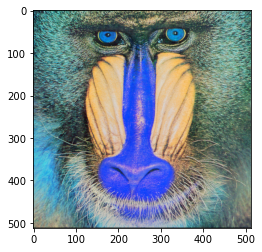

In [2]:
#Read image in BGR
image = cv2.imread('baboon.png')
plt.imshow(image)

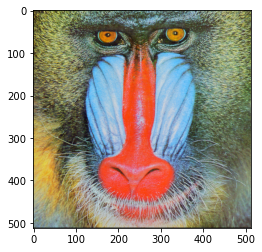

In [3]:
#Convert to RGB
im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)

In [4]:
#Convert to HSV
img_hsv = cv2.cvtColor(im_rgb, cv2.COLOR_RGB2HSV)

In [5]:
image_channel = 2

In [6]:
f = img_hsv[:,:,image_channel].copy()

## Appling the noise in pixels

In [7]:
g = np.zeros([f.shape[0],f.shape[1]])

In [8]:
for row in range(f.shape[0]-1):
    for collumn in range(f.shape[1]-1):
        if f[row][collumn] < 128:
            g[row][collumn] = 0
        else:
            g[row][collumn] = 1
            
        erro = f[row][collumn] - g[row][collumn] * 255
        
        f[row+1][collumn] += 7/16 * erro
        f[row-1][collumn+1] += 3/16 * erro
        f[row][collumn+1] += 5/16 * erro
        f[row+1][collumn+1] += 1/16 * erro

In [9]:
img_copy = img_hsv.copy()

In [10]:
img_copy[:,:,image_channel] = f

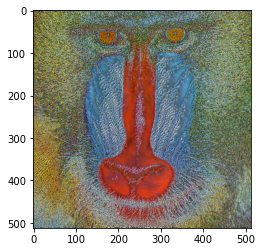

In [11]:
img_rgb_copy = cv2.cvtColor(img_copy, cv2.COLOR_HSV2RGB)
plt.imshow(img_rgb_copy)